In [1]:
%load_ext autoreload
%autoreload 2
import sys
import collections
import numpy as np
import re
import os
# sys.path.append("/private/home/alexandrerame/domainbedv2/")
# sys.path.append("/private/home/alexandrerame/slurmconfig/notebook/data")

sys.path.append("/home/rame/domainbedv2/")
from domainbed.codeplot import plot
plot.plt.style.use('default')
sys.path.append("/data/rame/logs_experiments_notebook/")

In [2]:
plot.dict_key_to_label.update(
    {
        "pos1": "Review positivity",
        "posimdb": "lvwerra/distilbert-imdb",
        "pos": "distilbert-base-uncased-finetuned-sst-2-english",
        "toxic": "martin-ha/toxic-comment-model",
        "quality2": "valurank/distilbert-quality",
        "hfl": "OpenAssistant/reward-model-deberta-v3-large-v2",
        "hfb": "OpenAssistant/reward-model-deberta-v3-base",
        "hfd": "OpenAssistant/reward-model-electra-large-discriminator",
        "hfg": "sugam11/gpt2-rlhf-reward",
    }
)
plot.plt.rcParams["figure.figsize"] = (7, 7)
plot.SIZE_AXIS = "small"
plot.SIZE = "small"

colormaps = [
    "Reds", "Blues", "Greens", "Oranges", "Greys", "Purples", "Reds", "Blues", "Greens", "Oranges",
    "Greys", "Purples",
"Yellows",
"Light_Yellows",
"Dark_Blues",
"Blues_Greys",
"Dark_Greys",
] * 2


# Summary

In [8]:
from llamasummary import logs_tristan_cog_step20_v0, logs_tristan_cog_step40_kl005, logs_tristan_cog_step40, logs_tristan_cog_step30, logs_tristan_cog_step40_v0, logs_cogsoups_step40

In [9]:
modules_summary = [logs_tristan_cog_step40_kl005, logs_tristan_cog_step40, logs_tristan_cog_step30]

In [10]:
for modules in [modules_summary]:
    for module in modules:
        module.l = []
        module.label = " ".join(re.split('_|\.', os.path.split(module.__file__)[-1])[1:-1])
        for key in module.d.keys():
            if True:
                new_d = {"lambda": key}
                new_d["tristan"] = module.d[key][0]["LABEL_0"]
                new_d["cogd"] = module.d[key][1]["FAITHFUL"] - module.d[key][1]["HALLUCINATED"]
                new_d["cogfaithful"] = module.d[key][1]["FAITHFUL"]
                module.l.append(new_d)

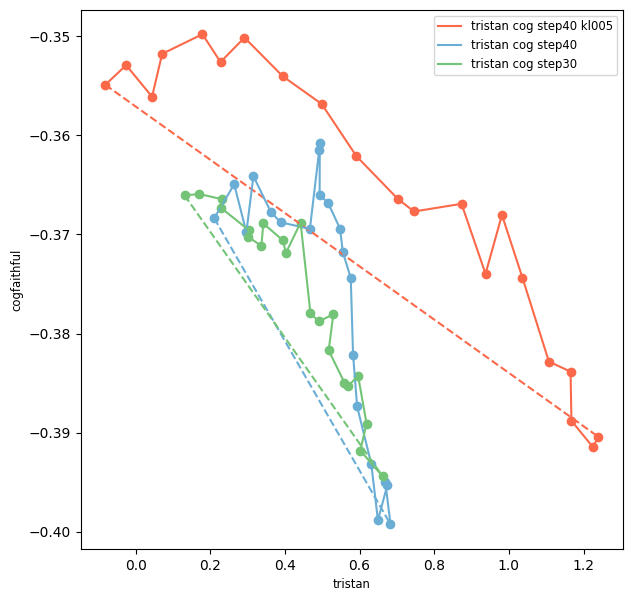

In [11]:
fig_dr = plot.plot_key(
    [module.l for module in modules_summary],
    key_x="tristan",
    key_y="cogfaithful",
    labels=[module.label for module in modules_summary],
    loc="best",
    # keycolor="abs|lambda-0.5",
    #keysize="hfl",
    colormaps=colormaps,
    linestyles=["solid" for i, _ in enumerate(modules_summary)],
    connect_points=True,
    connect_endpoints=True,
    order=2,
)

# LLAMA HF 32

In [4]:
os.listdir("/data/rame/logs_experiments_notebook/llamahf32")

['logs_rl_merged_lora8.py',
 'logs_hfb_hfd_step10.py',
 'logs_hfb_hfd_step70.py',
 'logs_quality2_pos_step140.py',
 'logs_hfb_hfd_step170_200_fixed.py',
 'logs_hfb_hfd_step120.py',
 'llama_experiments_review_old.py',
 'logs_hfb_hfd_step20.py',
 '__pycache__',
 'logs_hfb_hfd_step190_200.py',
 'logs_hfb_hfd_step170.py',
 'logs_alpaca_hfb_noref_step90.py',
 'logs_hfb_hfd_step190_200_fixed.py',
 'logs_hfb_hfd_step190.py',
 'logs_toxic_quality_step40.py',
 'logs_quality2_hfb_step10.py',
 'llama_experiments_review.py',
 'logs_multihf.py',
 'logs_alpaca_hfd_noref_step90.py',
 'logs_hfb_hfd_noref_step90.py',
 'logs_hfb_hfd_step170_200.py',
 'logs_quality2_pos_step60.py']

In [3]:
from llamahf32 import logs_hfb_hfd_step190, logs_hfb_hfd_step10, logs_hfb_hfd_step70, logs_quality2_pos_step140, logs_hfb_hfd_step120, logs_hfb_hfd_step20, logs_hfb_hfd_step170, logs_alpaca_hfb_noref_step90, logs_quality2_hfb_step10, llama_experiments_review, logs_alpaca_hfd_noref_step90, logs_hfb_hfd_noref_step90, logs_quality2_pos_step60, logs_hfb_hfd_step190_200, logs_rl_merged_lora8, logs_hfb_hfd_step170_200, logs_hfb_hfd_step170_200_fixed, logs_hfb_hfd_step190_200_fixed, logs_toxic_quality_step40, logs_multihf, logs_toxic_quality_step90_200

In [4]:
modules = [
    logs_hfb_hfd_noref_step90, logs_alpaca_hfb_noref_step90, logs_alpaca_hfd_noref_step90, logs_quality2_hfb_step10, ]
modules_quality2_pos = [logs_toxic_quality_step90_200, logs_toxic_quality_step40, logs_quality2_pos_step60, logs_quality2_pos_step140]
modules_hfb_hfd = [
    logs_hfb_hfd_step10, logs_rl_merged_lora8, logs_hfb_hfd_step20, logs_hfb_hfd_step70,
    logs_hfb_hfd_step120, logs_hfb_hfd_step170, logs_hfb_hfd_step190, logs_multihf
]
modules_hfb_hfd_200 = [
    logs_hfb_hfd_step170_200, logs_hfb_hfd_step190_200, logs_hfb_hfd_step170_200_fixed,
    logs_hfb_hfd_step190_200_fixed
]


In [5]:
for modules in [modules_quality2_pos, modules_hfb_hfd, modules_hfb_hfd_200]:
    for module in modules:
        module.l = []
        module.label = " ".join(re.split('_|\.', os.path.split(module.__file__)[-1])[1:-1])
        for key in module.d.keys():
            if True:
                new_d = {"lambda": key}
                new_d["pos0"] = module.d[key][0]["POSITIVE"]
                new_d["posd0"] = module.d[key][0]["POSITIVE"] - module.d[key][0]["NEGATIVE"]
                new_d["pos1"] = module.d[key][1]["POSITIVE"]
                new_d["posd1"] = module.d[key][1]["POSITIVE"] - module.d[key][1]["NEGATIVE"]
                new_d["toxic"] = module.d[key][2]["toxic"]
                new_d["nontoxic"] = module.d[key][2]["non-toxic"] - module.d[key][2]["toxic"]                
                new_d["quality"] = module.d[key][3]["good"]
                new_d["quality1"] = module.d[key][3]["medium"]
                new_d["qualityd"] = module.d[key][3]["good"] - module.d[key][3]["bad"]
                new_d["hfl"] = module.d[key][4]["LABEL_0"]
                new_d["hfb"] = module.d[key][5]["REWARD"]
                new_d["hfd"] = module.d[key][6]["REWARD"]
                new_d["hfg"] = module.d[key][7]["LABEL_0"]
                module.l.append(new_d)

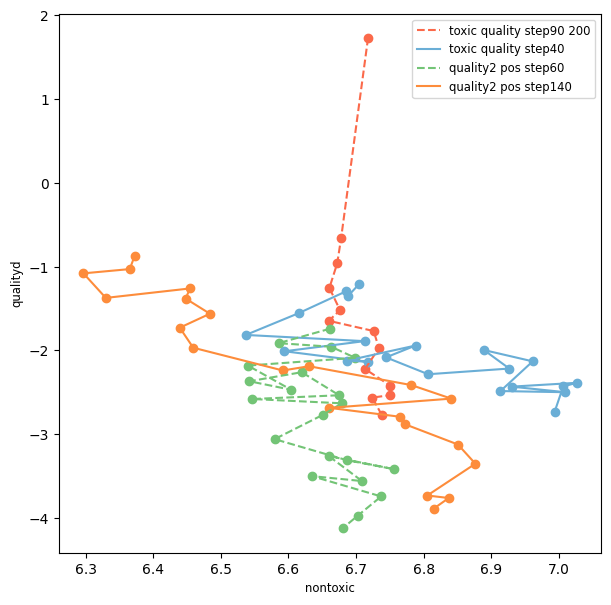

In [7]:
fig_dr = plot.plot_key(
    [module.l for module in modules_quality2_pos],
    key_x="nontoxic",
    key_y="qualityd",
    labels=[module.label for module in modules_quality2_pos],
    loc="best",
    # keycolor="abs|lambda-0.5",
    #keysize="hfl",
    colormaps=colormaps,
    linestyles=["solid" if i % 2 else "dashed" for i, _ in enumerate(modules_quality2_pos)],
    connect_points=True,
    order=2,
)

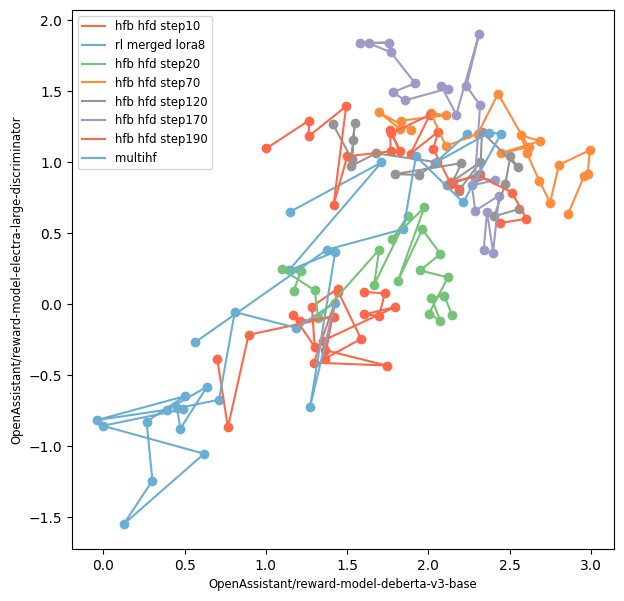

In [16]:
fig_dr = plot.plot_key(
    [module.l for module in modules_hfb_hfd],
    #list_indexes = [-1],
    key_x="hfb",
    key_y="hfd",
    labels=[module.label for module in modules_hfb_hfd],
    loc="best",
    # keycolor="abs|lambda-0.5",
    #keysize="hfl",
    colormaps=colormaps,
    linestyles=["solid" for i, _ in enumerate(modules_hfb_hfd)],
    connect_points=True,
    connect_endpoints=False,
    order=2,
)

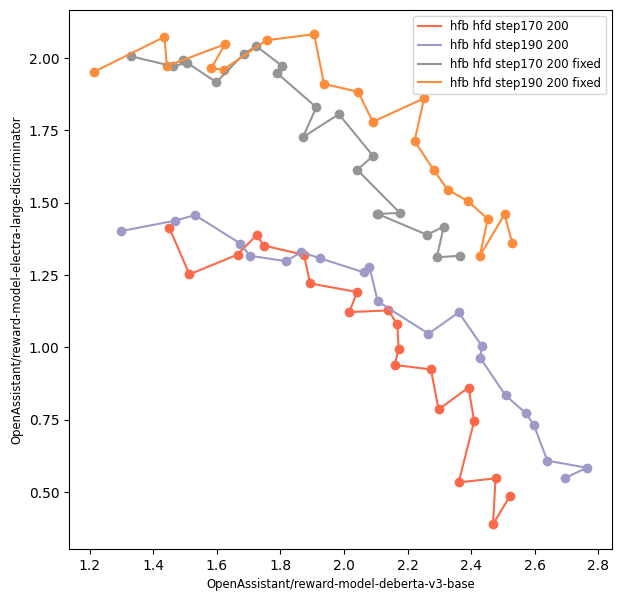

In [15]:
fig_dr = plot.plot_key(
    [module.l for module in modules_hfb_hfd_200],
    #list_indexes = [-1],
    key_x="hfb",
    key_y="hfd",
    labels=[module.label for module in modules_hfb_hfd_200],
    loc="best",
    # keycolor="abs|lambda-0.5",
    #keysize="hfl",
    colormaps=colormaps,
    linestyles=["solid" for i, _ in enumerate(modules_hfb_hfd_200)],
    connect_points=True,
    connect_endpoints=False,
    order=2,
)

# LLAMA HF

In [ ]:
os.listdir("/data/rame/logs_experiments_notebook/llamahf")

In [ ]:
from llamahf import logs_rl_alpaca_hfd_hfb, logs_rl_alpaca_hfd_hfb5, logs_rl_alpaca_hfb_hfd, logs_rl_alpaca_hfb_hfd5, logs_rl_hfb_hfd, logs_rl_alpaca_hfb, logs_rl_alpaca_hfd

In [ ]:
modules = [
    logs_rl_alpaca_hfb_hfd, logs_rl_alpaca_hfb_hfd5, logs_rl_alpaca_hfd_hfb,
    logs_rl_alpaca_hfd_hfb5, logs_rl_hfb_hfd, logs_rl_alpaca_hfb, logs_rl_alpaca_hfd
]
for module in modules:
    module.l = []
    for key in module.d.keys():
        if True:
            new_d = {"lambda": key}
            new_d["pos0"] = module.d[key][0]["POSITIVE"]
            new_d["posd0"] = module.d[key][0]["POSITIVE"] - module.d[key][0]["NEGATIVE"]
            new_d["pos1"] = module.d[key][1]["POSITIVE"]
            new_d["posd1"] = module.d[key][1]["POSITIVE"] - module.d[key][1]["NEGATIVE"]
            new_d["toxic"] = module.d[key][2]["toxic"]
            new_d["toxicd"] = module.d[key][2]["toxic"] - module.d[key][2]["non-toxic"]
            new_d["quality"] = module.d[key][3]["good"]
            new_d["quality1"] = module.d[key][3]["medium"]
            new_d["qualityd"] = module.d[key][3]["good"] - module.d[key][3]["bad"]
            new_d["hfl"] = module.d[key][4]["LABEL_0"]
            new_d["hfb"] = module.d[key][5]["REWARD"]
            new_d["hfd"] = module.d[key][6]["REWARD"]
            module.l.append(new_d)

In [ ]:

fig_dr = plot.plot_key(
    [module.l for module in modules],
    key_x="hfb",
    key_y="hfd",
    labels=[module.label for module in modules],
    loc="best",
    # keycolor="abs|lambda-0.5",
    # keysize="hfl",
    colormaps=colormaps,
    linestyles=["solid" if i % 2 else "dashed" for i, _ in enumerate(modules)],
    connect_points=True,
    order=2,
)

# LLAMA

In [ ]:
os.listdir("/data/rame/logs_experiments_notebook/llama")

In [ ]:
from llama import logs_rl_quality2_hf, logs_rl_posimdb_pos, logs_rl_hfl_quality2, logs_rl_hfl_hf, logs_rl_alpaca_posimdb, logs_rl_pos_hf, logs_rl_posimdb_quality2, logs_rl_alpaca_quality2, logs_rl_alpaca_hf, logs_rl_posimdb_hf, logs_rl_pos_quality2 

In [ ]:
modules = [
    logs_rl_alpaca_hf,
    logs_rl_alpaca_posimdb,
    logs_rl_posimdb_hf,
    # logs_rl_posimdb_pos,
    logs_rl_pos_hf,
    logs_rl_pos_quality2,
    logs_rl_quality2_hf,
    logs_rl_posimdb_quality2,
    # logs_rl_hfl_hf,
    # logs_rl_hfl_quality2
    logs_rl_alpaca_quality2,
]
for module in modules:
    module.l = []
    for key in sorted(module.d.keys()):
        if 0 <= key <= 1:
            new_d = {"lambda": key}
            new_d["pos0"] = module.d[key][0]["POSITIVE"]
            new_d["posd0"] = module.d[key][0]["POSITIVE"] - module.d[key][0]["NEGATIVE"]
            new_d["pos1"] = module.d[key][1]["POSITIVE"]
            new_d["posd1"] = module.d[key][1]["POSITIVE"] - module.d[key][1]["NEGATIVE"]
            new_d["toxic"] = module.d[key][2]["toxic"]
            new_d["toxicd"] = module.d[key][2]["toxic"] - module.d[key][2]["non-toxic"]
            new_d["quality"] = module.d[key][3]["good"]
            new_d["quality1"] = module.d[key][3]["medium"]
            new_d["qualityd"] = module.d[key][3]["good"] - module.d[key][3]["bad"]
            new_d["hfl"] = module.d[key][4]["LABEL_0"]
            new_d["hfb"] = module.d[key][5]["REWARD"]
            module.l.append(new_d)

In [ ]:
plot.plt.rcParams["figure.figsize"] = (7, 7)
plot.SIZE_AXIS = "small"
plot.SIZE = "small"
fig_dr = plot.plot_key(
    [module.l for module in modules],
    list_indexes=range(4),
    key_x="hfb",
    key_y="pos1",
    labels=[module.label for module in modules],
    loc="best",
    # keycolor="abs|lambda-0.5",
    # keysize="lambda",
    colormaps=[
        "Reds",
        "Purples",
        "Greys",
        "Oranges",
        "Blues",
        "Yellows",
        "Greens",
        "Reds"
    ],
    linestyles=["solid" if i % 2 else "dashed" for i, _ in enumerate(modules)],
    connect_points=True,
    order=2,
)

# NEOX

In [ ]:
sys.path.append("/data/rame/logs_experiments_notebook/")
from gptneox import logs_posimdb_negimdb, logs_quality_negimdb, logs_toxic_neg, logs_rl_pos_vs_toxic, logs_rl_posimdb_vs_toxic0, logs_rl_pos_vs_quality2, logs_rl_toxic_vs_quality1, logs_rl_toxic_vs_quality2, logs_rl_posimdb_vs_toxic, logs_rl_pos_posimdb

In [ ]:
modules = [
    logs_posimdb_negimdb, logs_quality_negimdb, logs_rl_pos_vs_quality2, logs_rl_pos_posimdb,
    # logs_toxic_neg,
    # logs_rl_pos_vs_toxic,
    # logs_rl_posimdb_vs_toxic0,
    # logs_rl_toxic_vs_quality1,
    # logs_rl_toxic_vs_quality2,
    # logs_rl_posimdb_vs_toxic,
]
for module in modules:
    module.l = []
    for key in sorted(module.d.keys()):
        if 0 <= key <= 1:
            new_d = {"lambda": key}
            new_d["pos0"] = module.d[key][0]["POSITIVE"]
            new_d["posd0"] = module.d[key][0]["POSITIVE"] - module.d[key][0]["NEGATIVE"]
            new_d["pos1"] = module.d[key][1]["POSITIVE"]
            new_d["posd1"] = module.d[key][1]["POSITIVE"] - module.d[key][1]["NEGATIVE"]
            new_d["toxic"] = module.d[key][2]["toxic"]
            new_d["toxicd"] = module.d[key][2]["toxic"] - module.d[key][2]["non-toxic"]
            new_d["quality"] = module.d[key][3]["good"]
            new_d["quality1"] = module.d[key][3]["medium"]
            new_d["qualityd"] = module.d[key][3]["good"] - module.d[key][3]["bad"]
            module.l.append(new_d)

In [ ]:
plot.plt.rcParams["figure.figsize"] = (7, 7)
plot.SIZE_AXIS = "small"
plot.SIZE = "small"
fig_dr = plot.plot_key(
    [module.l for module in modules],
    key_x="posd0",
    key_y="quality",
    labels=[module.label for module in modules],
    loc="best",
    # keycolor="lambda",
    # colormaps=[
    #     "Reds",
    #     "Purples",
    #     "Oranges",
    #     "Greys",
    #     "Blues",
    #     "Yellows",
    #     "Greens",
    # ],
    linestyles=["solid" for module in modules],
    # linestyles=[ls if ls not in [] else None for ls in [
    #     "solid",
    #     "dashed",
    #     "solid",
    #     "solid",
    # ]],
    connect_points=True,
    order=2,
)